Importing the Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

Importing the dataset:

In [2]:
data = pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


Preprocessing the data:

In [3]:
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status'])
data['Urban']= label_encoder.fit_transform(data['Urban'])
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


EDA:

(array([57., 53., 75., 58., 56., 59., 64., 53., 52., 73.]),
 array([10003. , 18964.6, 27926.2, 36887.8, 45849.4, 54811. , 63772.6,
        72734.2, 81695.8, 90657.4, 99619. ]),
 <BarContainer object of 10 artists>)

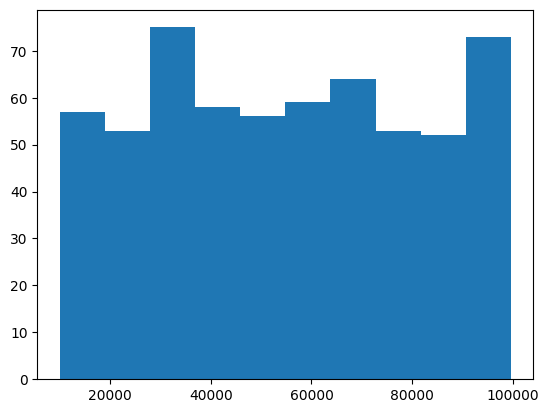

In [4]:
plt.hist(data["Taxable.Income"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbc68a2bac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbc68a64040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbc68a287c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbc68a64580>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbc68a64820>],
 'means': []}

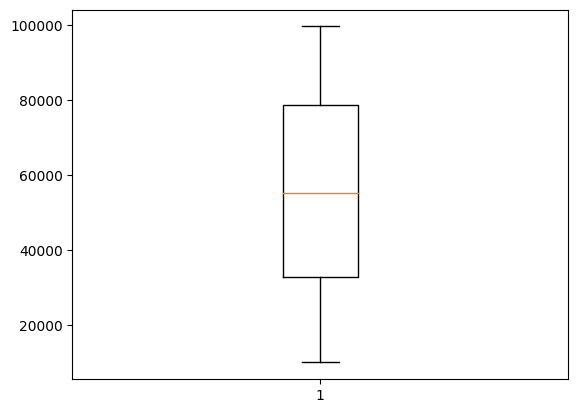

In [5]:
plt.boxplot(data["Taxable.Income"])

All the values in the Sales column above the median value can be considered as High Sales otherwose they will be considered as low sales:

In [6]:
for i in range(len(data["Taxable.Income"])):
    if data["Taxable.Income"][i] <= 30000:
        data["Taxable.Income"][i] = 0
    else:
        data["Taxable.Income"][i] = 1

In [7]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,1,154058,0,1
598,1,1,1,180083,17,0


In [8]:
# Just checking if there are any errors in the above logic.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Undergrad,600.0,0.520000,0.500017,0.0,0.00,1.0,1.00,1.0
Marital.Status,600.0,1.046667,0.821958,0.0,0.00,1.0,2.00,2.0
Taxable.Income,600.0,0.793333,0.405252,0.0,1.00,1.0,1.00,1.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0
Urban,600.0,0.503333,0.500406,0.0,0.00,1.0,1.00,1.0


In [9]:
x=data.loc[:, data.columns != "Taxable.Income"]
y=data['Taxable.Income']

In [10]:
data['Taxable.Income'].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

Splitting the data:

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=50)

Building the Random Forest model using Entropy criteria:

In [12]:
model = RandomForestClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4)

Checking the accuracy of the model:

In [13]:
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

1    120
dtype: int64

In [14]:
pd.crosstab(y_test,preds)

col_0,1
Taxable.Income,
0,21
1,99


In [15]:
print(f"Accuracy: {round(np.mean(preds==y_test)*100, 2)}%")

Accuracy: 82.5%


Best Features found using Entropy method:

In [16]:
fn = list(x.columns)
feature_imp = pd.Series(model.feature_importances_, index= fn).sort_values(ascending=False)
feature_imp

City.Population    0.522042
Work.Experience    0.301988
Marital.Status     0.083371
Undergrad          0.050226
Urban              0.042373
dtype: float64

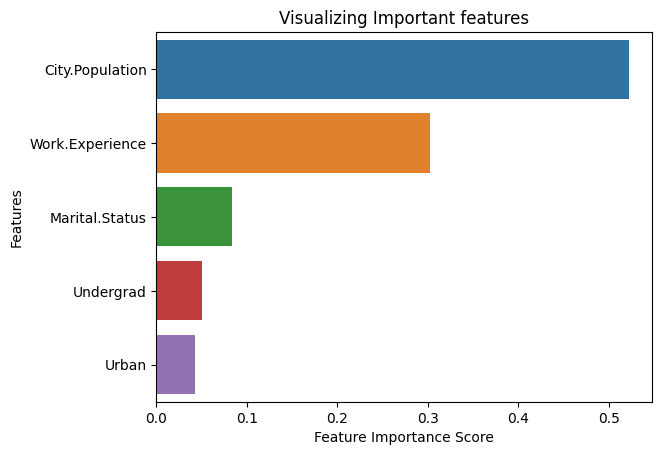

In [17]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important features")
plt.show()

The above features are the best using entropy method for classification of high sales and low sales

Random Forest using Gini criteria:

In [18]:
model_gini = RandomForestClassifier(criterion='gini', max_depth=4)

In [19]:
model_gini.fit(x_train, y_train)

RandomForestClassifier(max_depth=4)

Checking the accuracy of the model:

In [20]:
pred=model_gini.predict(x_test)
print(f"Accuracy: {round(np.mean(pred==y_test)*100, 2)}%")

Accuracy: 82.5%


Best Features found using Gini impurity criteria:

In [21]:
feature_imp_gini = pd.Series(model_gini.feature_importances_, index= fn).sort_values(ascending=False)
feature_imp_gini

City.Population    0.520663
Work.Experience    0.284686
Marital.Status     0.091914
Undergrad          0.052846
Urban              0.049890
dtype: float64

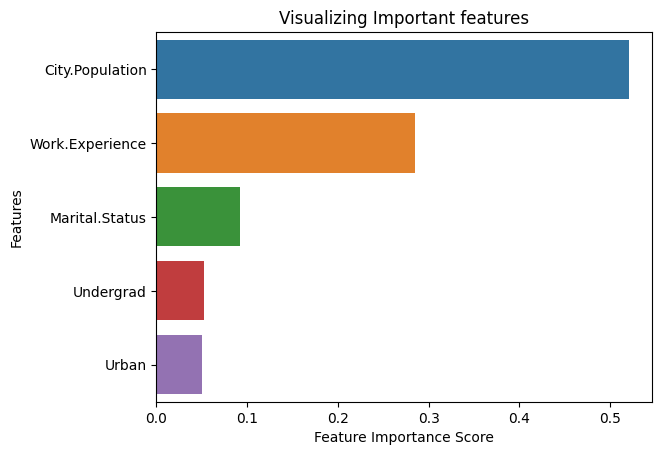

In [22]:
sns.barplot(x=feature_imp_gini, y=feature_imp_gini.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important features")
plt.show()